## This is a example of how you will be doing projects in python.
### Use markdown cells -OR- comments in cells to place AT LEAST the question number you are working on. 

3.	Import the required packages

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [128]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [130]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [133]:

print("Shape of the DataFrame:", gdp_df.shape)
print("\nData types of each column:")
print(gdp_df.dtypes)

Shape of the DataFrame: (8219, 4)

Data types of each column:
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


In [173]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [138]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)
gdp_df

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


In [140]:
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df


,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144
...,...,...,...
8214,Zimbabwe,1994,3965.730986
8215,Zimbabwe,1993,3634.750494
8216,Zimbabwe,1992,3649.891947
8217,Zimbabwe,1991,4126.405247


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?


In [146]:

all_years = gdp_df['Year'].nunique()


country_year_counts = gdp_df.groupby('Country')['Year'].nunique()


complete_countries = country_year_counts[country_year_counts == all_years]
num_complete_countries = complete_countries.count()

print(f"✅ Number of countries with data for all {all_years} years: {num_complete_countries}")

✅ Number of countries with data for all 34 years: 228


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others? 
   

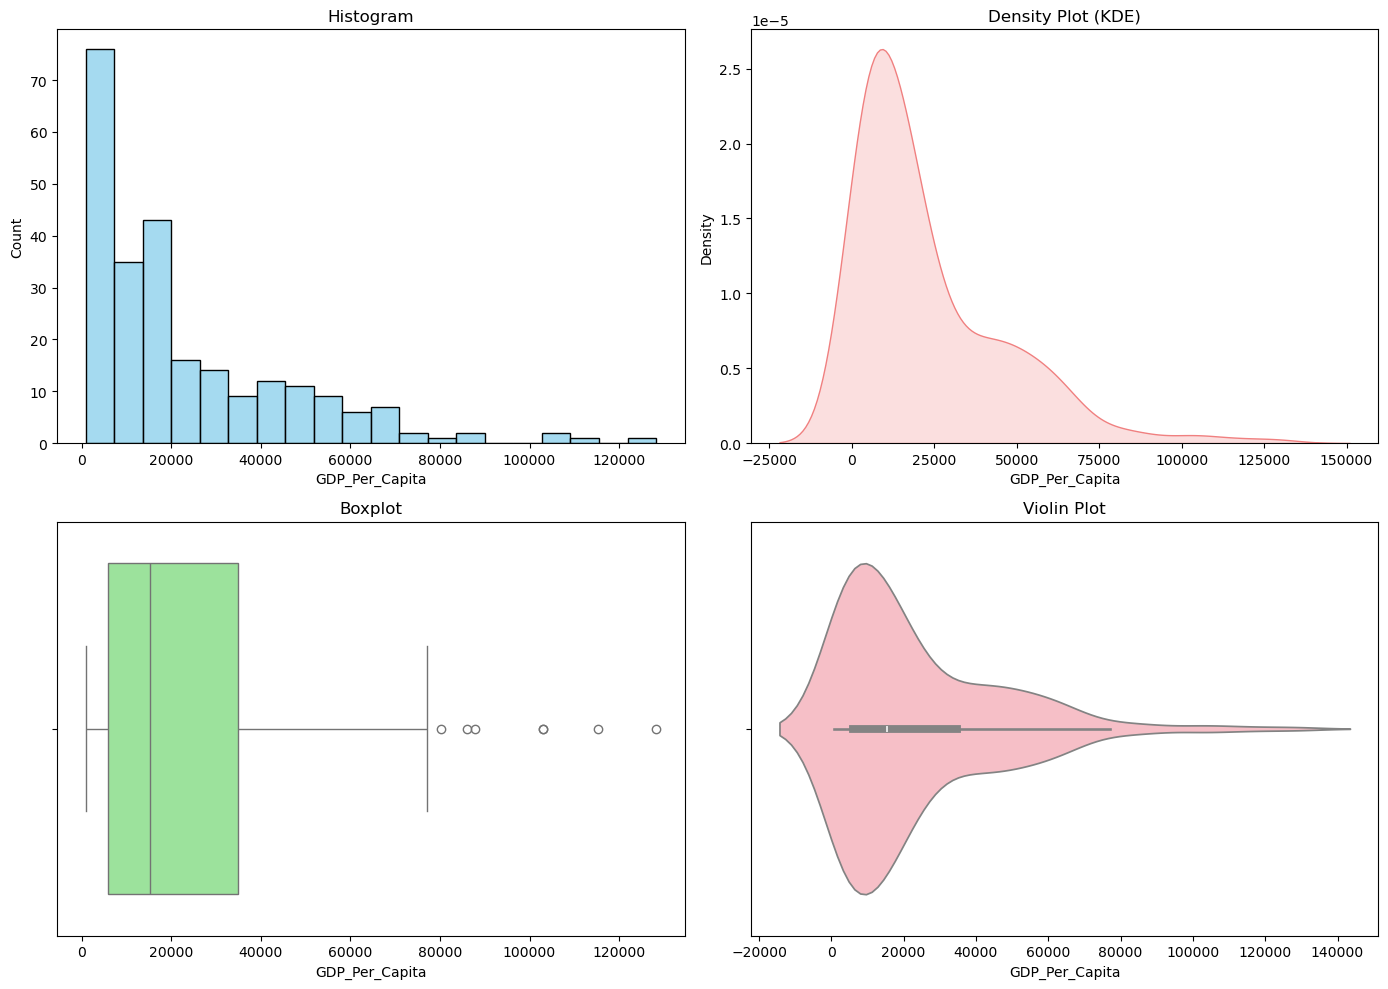

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

years = gdp_df['Year']

GDP_per_capita_2020 = gdp_df[years == 2020]["GDP_Per_Capita"]

GDP_per_capita_2020 = pd.to_numeric(GDP_per_capita_2020, errors='coerce')
gdp_df = gdp_df.dropna()

# Plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
sns.histplot(GDP_per_capita_2020, bins=20, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title("Histogram")

# Density Plot
sns.kdeplot(GDP_per_capita_2020, ax=axes[0, 1], fill=True, color='lightcoral')
axes[0, 1].set_title("Density Plot (KDE)")

# Boxplot
sns.boxplot(x=GDP_per_capita_2020, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title("Boxplot")

# Violin Plot
sns.violinplot(x=GDP_per_capita_2020, ax=axes[1, 1], color='lightpink')
axes[1, 1].set_title("Violin Plot")

plt.tight_layout()
plt.show()


9. What was the median GDP per capita value in 2020?

In [171]:
median_gdp = GDP_per_capita_2020.median()
print("Median GDP per capita in 2020:", round(median_gdp, 2))


Median GDP per capita in 2020: 15309.24


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.
